In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
def save_fig(fig, name):
    fig.savefig(rf"C:\Users\wuyua\OneDrive - The University of Western Ontario\Research\crm\paper\figure\{name}.png", bbox_inches="tight")

In [3]:
from solvers import hr_grid_forward_step_size_independent_1d, uw_grid_forward_step_size_independent_1d, pa_forward_step
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter
from scipy.stats import norm

# 1D Growth

In [4]:
g = 1.0
dL = 1.0
dt = 0.5
t_total = 200
n_init = np.zeros((1000, ))
n_init[10:80] = 1
norm_part = norm.pdf(np.linspace(0, 300, n_init[400: 600].size), loc=200, scale=60)
norm_part /= norm_part.max()
n_init[400: 600] = norm_part

L_edges = np.arange(0, n_init.size+1, dL)
L = 0.5*(L_edges[1:] + L_edges[:-1])

n_hr = n_init.copy()
n_uw = n_init.copy()
n_pa = np.vstack((L, n_init)).T
n_pa = n_pa[n_init > 0]

hr_times = []
uw_times = []
pa_times = []

for t in np.arange(0, t_total, dt):
    t = perf_counter()
    n_hr = hr_grid_forward_step_size_independent_1d(n_hr, dL, dt, g)
    hr_times.append(perf_counter() - t)
    
    t = perf_counter()
    n_uw = uw_grid_forward_step_size_independent_1d(n_uw, dL, dt, g)
    uw_times.append(perf_counter() - t)
    
    t = perf_counter()
    n_pa = pa_forward_step(n_pa, dt, g)
    pa_times.append(perf_counter() - t)

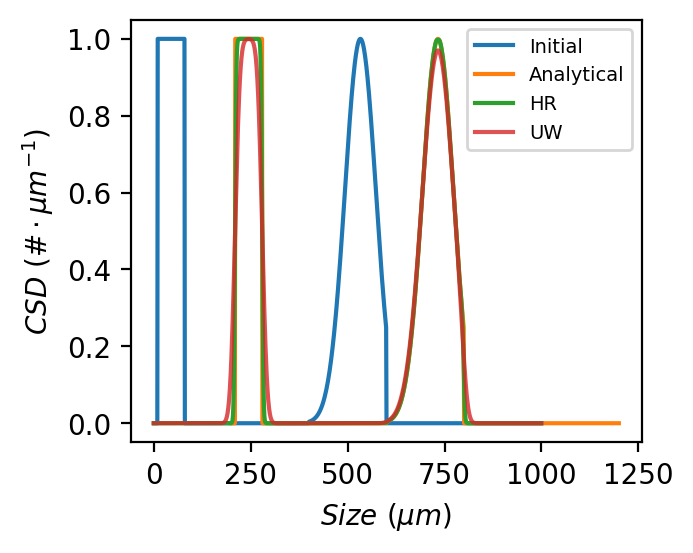

In [10]:
fig, ax = plt.subplots(figsize=(3.3,2.8), dpi=200)
ax.plot(L, n_init, 'C0', label="Initial")
ax.plot(L + t_total * g, n_init, 'C1', label=f"Analytical")
ax.plot(L, n_hr, 'C2', label=f"HR")
ax.plot(L, n_uw, 'C3', label=f"UW", zorder=5, alpha=0.8)
# ax.plot(n_pa[::4, 0], n_pa[::4, 1], 'C4.', label=f"PA", zorder=0)

ax.set_xlabel("$Size\ (\mu m)$")
ax.set_ylabel("$CSD\ (\#\cdot  \mu m^{-1})$")
ax.legend(fontsize=7)

In [11]:
save_fig(fig, "growth_only_1d")

In [ ]:
fig, ax = plt.subplots()
grid = np.logspace(-6, -4)
ax.hist(uw_times, bins=grid, label="Upwind")
ax.hist(hr_times, bins=grid,  label="HR")
ax.hist(pa_times, bins=grid,  label="PA")
ax.set_title("Computation time")
ax.set_xscale("log")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count")
ax.legend()

# 1D dissolve
Test only, not used.

In [ ]:
g = -1.0
dL = 1.0
dt = 0.5
t_total = 200
n_init = np.zeros((1000, ))
n_init[800:890] = 1

n_hr = n_init.copy()
n_uw = n_init.copy()

L_edges = np.arange(0, n_init.size+1, dL)
L = 0.5*(L_edges[1:] + L_edges[:-1])

hr_times = []
uw_times = []

for t in np.arange(0, t_total, dt):
    t = perf_counter()
    n_hr = hr_grid_forward_step_size_independent_1d(n_hr, dL, dt, g)
    hr_times.append(perf_counter() - t)
    
    t = perf_counter()
    n_uw = uw_grid_forward_step_size_independent_1d(n_uw, dL, dt, g)
    uw_times.append(perf_counter() - t)

In [ ]:
fig, ax = plt.subplots()
ax.plot(L, n_init, 'C0', label="t=0")
ax.plot(L, n_hr, 'C1', label=f"HR t={t_total}")
ax.plot(L, n_uw, 'C2', label=f"UW t={t_total}")
ax.plot(L + t_total * g, n_init, 'C3', label="Analytical")
ax.set_xlabel("Size (um)")
ax.set_ylabel("CSD")
ax.legend()

# 2D growth

In [ ]:
from solvers import hr_grid_forward_step_size_independent_2d, uw_grid_forward_step_size_independent_2d
from scipy.stats import binned_statistic_2d

In [ ]:
gs_pa = np.array([1.2, 0.3])
gs_uw = np.array([0.3, 1.2])
gs_hr = np.array([0.78, 0.78])
dL = 1.0
dt = 0.5
t_total = 400
n_init = np.zeros((800, 800))
n_init[100:250, 100:250] = 1

# normal_1d = np.linspace(0, 200, 200)
# normal_1d_val = norm.pdf(normal_1d, loc=100, scale=30)
# normal_2d_val = np.meshgrid(normal_1d_val, normal_1d_val)
# normal_2d_val = normal_2d_val[0] * normal_2d_val[1]
# normal_2d_val /= normal_2d_val.max()

# n_init[400:400+normal_1d.size, 400:400+normal_1d.size] = normal_2d_val

L_edges = [np.arange(0, sz+1, dL) for sz in n_init.shape]
L_edges_meshgrid = np.meshgrid(*L_edges)
L_centers = [0.5*(e[:-1] + e[1:]) for e in L_edges]
L_centers_meshgrid = np.meshgrid(*L_centers)


In [ ]:
hr_times = []
uw_times = []
pa_times = []

n_hr = n_init.copy()
n_uw = n_init.copy()
n_pa = np.vstack((L_centers_meshgrid[0].reshape(-1), L_centers_meshgrid[1].reshape(-1), n_init.reshape(-1))).T
n_pa = n_pa[n_pa[:, -1] > 0]
n_pa_init = n_pa.copy()

for t in np.arange(0, t_total, dt):
    t = perf_counter()
    n_hr = hr_grid_forward_step_size_independent_2d(n_hr, dL, dt, gs_hr)
    hr_times.append(perf_counter() - t)
    
    
    t = perf_counter()
    n_uw = uw_grid_forward_step_size_independent_2d(n_uw, dL, dt, gs_uw)
    uw_times.append(perf_counter() - t)
    
    t = perf_counter()
    n_pa = pa_forward_step(n_pa, dt, gs_pa)
    pa_times.append(perf_counter() - t)

In [ ]:
stat, xe, ye, bn = binned_statistic_2d(n_pa[:, 1], n_pa[:, 0], n_pa[:, -1], statistic="sum", bins=L_edges)

fig, ax = plt.subplots(figsize=(3.3, 3.3), dpi=200)
levels = np.linspace(0.1,1,10)
cmap = "jet"
ax.contour(L_centers_meshgrid[0], L_centers_meshgrid[1], n_hr.T, cmap=cmap, levels=levels)
ax.contour(L_centers_meshgrid[0], L_centers_meshgrid[1], n_uw.T, cmap=cmap, levels=levels)
ax.contour(L_centers_meshgrid[0], L_centers_meshgrid[1], n_init.T, cmap=cmap, levels=levels)
ax.contour(L_centers_meshgrid[0], L_centers_meshgrid[1], stat, cmap=cmap, levels=levels)

# analytical solutions
bounds_origin = np.array([
    (100,100),
    (100,250),
    (250,250),
    (250,100),
    (100,100),
])
uw_bounds = bounds_origin + gs_uw * t_total
ax.plot(uw_bounds[:, 0], uw_bounds[:, 1], lw=0.8, ls="dashed", c="k")

hr_bounds = bounds_origin + gs_hr * t_total
ax.plot(hr_bounds[:, 0], hr_bounds[:, 1], lw=0.8, ls="dashed", c="k")

pa_bounds = bounds_origin + gs_pa * t_total
ax.plot(pa_bounds[:, 0], pa_bounds[:, 1], lw=0.8, ls="dashed", c="k")

ax.set_xlabel("$L_2\ (\mu m)$")
ax.set_ylabel("$L_1\ (\mu m)$")


In [ ]:
save_fig(fig, "growth_only_2d")

In [ ]:
fig, ax = plt.subplots()
grid = np.logspace(-5, -1)
ax.hist(uw_times, bins=grid, label="Upwind")
ax.hist(hr_times, bins=grid,  label="HR")
ax.hist(pa_times, bins=grid,  label="PA")

ax.set_title("Computation time")
ax.set_xscale("log")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count")
ax.legend()

# 1D growth and nucleation (constant)

In [ ]:
from scipy.stats import binned_statistic
from compress import compress

In [ ]:
B = 1e5 # #/m3/s
g =0.7
dL = 1.0
dt = 1.0
t_total = 200.
n_init = np.zeros((400, ))

L_edges = np.arange(0, n_init.size+1, dL)
L = 0.5*(L_edges[1:] + L_edges[:-1])

n_hr = n_init.copy()
n_uw = n_init.copy()
N_pa = np.array([]).reshape((0, 2))
N_pa_compress = np.array([]).reshape((0, 2))

t = 0
while t < t_total:

    dt_ = min(dt, t_total - t)

    
    n_hr[0] += B * dt / dL
    n_hr = hr_grid_forward_step_size_independent_1d(n_hr, dL, dt_, g)
    
    n_uw[0] += B * dt / dL
    n_uw = uw_grid_forward_step_size_independent_1d(n_uw, dL, dt_, g)
    
    N_pa = np.vstack([N_pa, np.array((0., B * dt))])
    N_pa = pa_forward_step(N_pa, dt_, g)
    
    N_pa_compress = np.vstack([N_pa_compress, np.array((0., B * dt))])
    N_pa_compress = pa_forward_step(N_pa_compress, dt_, g)
    N_pa_compress = compress(N_pa_compress, 1.0, np.array([3.0]), 1.0)
    
    t += dt_
    

In [ ]:
lw = 1.2

fig, ax = plt.subplots(figsize=(3.3,3), dpi=200)

analytical = np.zeros_like(n_init)
analytical[0:int(np.floor(g*t_total))] = B * dt / g
ax.plot(L, analytical, 'C1', label=f"Analytical t={t_total}", lw=lw)


ax.plot(L, n_hr, 'C2', label=f"HR", lw=lw)
ax.plot(L, n_uw, 'C3', label=f"UW", lw=lw)

stat, xe, bn = binned_statistic(N_pa[:, 0], N_pa[:, -1], statistic="sum", bins=40)
n_pa = stat / np.diff(xe)
xcenter = (xe[1:] + xe[:-1]) * 0.5
ax.plot(xcenter[::3], n_pa[::3], 'C4.', label=f"PA", lw=lw, ms=4)

stat, xe, bn = binned_statistic(N_pa_compress[:, 0], N_pa_compress[:, -1], statistic="sum", bins=50)
n_pa_compress = stat / np.diff(xe)
xcenter = (xe[1:] + xe[:-1]) * 0.5
ax.plot(xcenter[::4], n_pa_compress[::4], 'C5.', label=f"PAC", lw=lw, ms=4)

ax.set_xlabel("$Size\ (\mu m)$")
ax.set_ylabel("$CSD\ (\#\cdot m^{-3} \cdot \mu m^{-1})$")
ax.ticklabel_format(axis='y', style='scientific', useMathText=True, useOffset=True, scilimits=(-3, 3))
ax.legend(fontsize=8)

In [ ]:
save_fig(fig, "nucleation_growth_1d")

# 1D size dependent growth

In [ ]:
from solvers import hr_grid_forward_step_size_dependent_1d,uw_grid_forward_step_size_dependent_1d

In [ ]:
g =0.1
dv = 1e-4
dt = 1e-4
t_total = 5
N_0 = 1.0
v_0 = 0.01

v_edges = np.arange(1e-4, 1, dv)
v = 0.5*(v_edges[1:] + v_edges[:-1])

n_init = N_0 / v_0 * np.exp(-v/v_0)
n_analytical_final = N_0 / v_0 * np.exp(-v/v_0*np.exp(-g*t_total) - g*t_total)
n_hr = n_init.copy()
n_uw = n_init.copy()

N_pa = np.vstack((v, n_init.copy())).T
N_pa = N_pa[N_pa[:, 1] >= 1e-8]
N_pa_init = N_pa.copy()

N_pa_cnt = N_pa_init.copy()
N_pa_cnt[:, -1] *= dv


t = 0
G = v * g
while t < t_total:

    dt_ = min(dt, t_total - t)
    
    n_hr = hr_grid_forward_step_size_dependent_1d(n_hr, dv, dt_, G)
    
    n_uw = uw_grid_forward_step_size_dependent_1d(n_uw, dv, dt_, G)
        
    N_pa_cnt = pa_forward_step(N_pa_cnt, dt_, np.expand_dims(N_pa_cnt[:, 0], 1) * g)
    t += dt_

In [ ]:
lw = 1.2
ms = 3.5
fig, ax = plt.subplots(figsize=(3.3,3), dpi=200)
ax.plot(v, n_init, "C0", label="Initial")
ax.plot(v, n_analytical_final, "C1", label=f"Analytical t={t_total}")
ax.plot(v, n_hr, 'C2.', label=f"HR", markevery=(2, 3), ms=ms)
ax.plot(v, n_uw, 'C3.', label=f"UW", markevery=(1, 3), ms=ms)

vg = np.linspace(0, 1e-2, 62)
# vg = np.logspace(-4, -2, 10)
stat, xe, bn = binned_statistic(N_pa_cnt[:, 0], N_pa_cnt[:, -1], statistic="sum", bins=vg)
xcenter = (xe[1:] + xe[:-1]) * 0.5

ax.plot(xcenter, stat / (xe[1:] - xe[:-1]), 'C4.', label=f"PA", markevery=1, ms=ms, zorder=1)
ax.set_xlabel("$Volume\ (\mu m^3)$")
ax.set_ylabel("$CSD\ (\#\cdot m^{-3} \cdot \mu m^{-3})$")
ax.ticklabel_format(axis='y', style='scientific', useMathText=True, useOffset=True, scilimits=(-3, 3))
ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_ylim([1e-3, 1e3])
ax.set_ylim([30, 75])
ax.set_xlim([1e-4, 1e-2])
ax.legend(fontsize=8)

In [ ]:
save_fig(fig, "size_dependent_1d_analytical")

In [ ]:
std = []
for i in range(5, 100):
    vg = np.linspace(0, 1e-2, i)
    stat, xe, bn = binned_statistic(N_pa_cnt[:, 0], N_pa_cnt[:, -1], statistic="sum", bins=vg)
    xcenter = (xe[1:] + xe[:-1]) * 0.5
    std.append([i, pd.Series(stat/(xe[1:] - xe[:-1])).rolling(4).std().mean()])

In [ ]:
std